## INTRODUCTION
For this project, I'll be working on "Womart" dataset.

The purpose of this project will be to predict the number of sales for each store to provide the stores with essential insights into the upcoming inventory and cash flow for the following months.

The dataset that they provided contains the information of sales of the past 18 months along with:

<ul>
<li>ID: Unique identifier for a row</li>

<li>Store id: Unique id for each store</li>

<li>Store type: Type of the store</li>

<li>Location type: Type of the location where the store is located</li>

<li>Region Code: Code of the region where the store is located</li>

<li>Date: Information about the date</li>

<li>Holiday: If there is a holiday on the given date</li>

<li>Discount: If the store offers a discount on the given date</li>

<li>Salary: client salaries</li>

<li>Order:Number of orders placed</li>

<li>Sales:sales made</li>
</ul>

In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# data loading
df = pd.read_csv("supplement.csv")
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


## EDA

In [4]:
df.shape

(188340, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [6]:
df.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [40]:
#converting columns to lower case
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip('#')
df.head(2)

,id,store_id,store_type,location_type,region_code,date,holiday,discount,order,sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12


In [41]:
# removing id column
df.drop("id",axis=1,inplace=True)
df.head(2)

,store_id,store_type,location_type,region_code,date,holiday,discount,order,sales
0,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12


In [25]:
# missing values guery
df.isna().sum()

store_id         0
store_type       0
location_type    0
region_code      0
date             0
holiday          0
discount         0
order            0
sales            0
dtype: int64

observation : There is no missing values in dataset

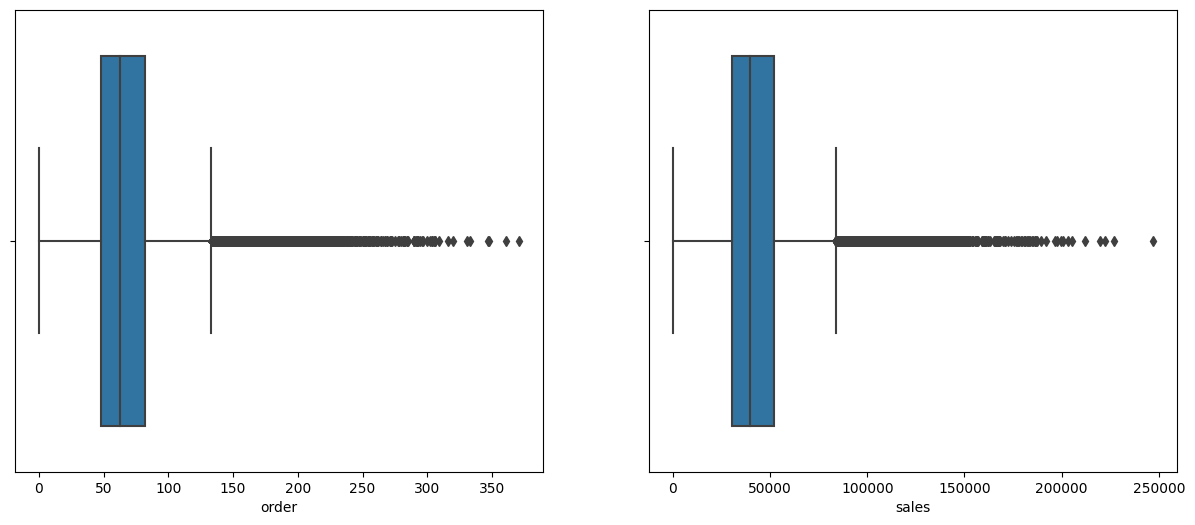

In [42]:
# checking outliers by Box plot
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x = df['order'])
plt.subplot(1, 2, 2)
sns.boxplot(x = df['sales'])
plt.show()

In [43]:
outliers_list=["order","sales"]

In [ ]:
for col in outliers_list:
    Q1 = df[col].quantile(0.05)
    Q3 = df[col].quantile(0.95)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    df[col] = df[col].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))

In [46]:
df.drop("date",inplace=True,axis=1)

In [10]:
df.head()

,store_id,store_type,location_type,region_code,holiday,discount,order,sales
0,1,S1,L3,R1,1,Yes,9.0,7011.84
1,253,S4,L2,R1,1,Yes,60.0,51789.12
2,252,S3,L2,R1,1,Yes,42.0,36868.20
3,251,S2,L3,R1,1,Yes,23.0,19715.16
4,250,S2,L3,R4,1,Yes,62.0,45614.52


In [47]:
# Encoding
# Let's convert categorical variables to numeric variables...
df2=pd.get_dummies(df[["discount","region_code","location_type",
                       "store_type"]])
df2

,discount_No,discount_Yes,region_code_R1,region_code_R2,region_code_R3,region_code_R4,location_type_L1,location_type_L2,location_type_L3,location_type_L4,location_type_L5,store_type_S1,store_type_S2,store_type_S3,store_type_S4
0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0
1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1
2,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0
3,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
4,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188335,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
188336,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1
188337,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0
188338,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0


In [48]:
df.drop(["discount","region_code","location_type","store_type"],
        axis=1,inplace=True)
df.head()

,store_id,holiday,order,sales
0,1,1,9.0,7011.84
1,253,1,60.0,51789.12
2,252,1,42.0,36868.20
3,251,1,23.0,19715.16
4,250,1,62.0,45614.52


In [49]:
df=pd.concat([df,df2],axis=1)
df.head()

,store_id,holiday,order,sales,discount_No,discount_Yes,region_code_R1,region_code_R2,region_code_R3,region_code_R4,location_type_L1,location_type_L2,location_type_L3,location_type_L4,location_type_L5,store_type_S1,store_type_S2,store_type_S3,store_type_S4
0,1,1,9.0,7011.84,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0
1,253,1,60.0,51789.12,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1
2,252,1,42.0,36868.20,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0
3,251,1,23.0,19715.16,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
4,250,1,62.0,45614.52,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0


In [50]:
df.columns

Index(['store_id', 'holiday', 'order', 'sales', 'discount_No', 'discount_Yes',
       'region_code_R1', 'region_code_R2', 'region_code_R3', 'region_code_R4',
       'location_type_L1', 'location_type_L2', 'location_type_L3',
       'location_type_L4', 'location_type_L5', 'store_type_S1',
       'store_type_S2', 'store_type_S3', 'store_type_S4'],
      dtype='object')

In [21]:
df.columns

Index(['store_id', 'holiday', 'order', 'sales', 'discount_No', 'discount_Yes',
       'region_code_R1', 'region_code_R2', 'region_code_R3', 'region_code_R4',
       'location_type_L1', 'location_type_L2', 'location_type_L3',
       'location_type_L4', 'location_type_L5', 'store_type_S1',
       'store_type_S2', 'store_type_S3', 'store_type_S4'],
      dtype='object')

In [54]:
# Modelling
X=df.drop("order",axis=1)
y=df["order"]

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                               random_state=0)

In [56]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [57]:
ridge=Ridge().fit(X_train,y_train)
lasso=Lasso().fit(X_train,y_train)
enet=ElasticNet().fit(X_train,y_train)
knn=KNeighborsRegressor().fit(X_train,y_train)
ada=AdaBoostRegressor().fit(X_train,y_train)
dtc=DecisionTreeRegressor().fit(X_train,y_train)

In [28]:
rf=RandomForestRegressor().fit(X_train,y_train)
xgb=XGBRegressor().fit(X_train,y_train)

In [58]:
models=[ridge,lasso,enet,knn,ada,dtc,rf,xgb]

In [59]:
def ML(y,models):
    accuary=models.score(X_train,y_train)
    return accuary

In [60]:
for i in models:
     print(i,"Algorithm succed rate :",ML("order",i))

Ridge() Algorithm succed rate : 0.9312360145038968
Lasso() Algorithm succed rate : 0.9100215445752117
ElasticNet() Algorithm succed rate : 0.9019434959187964
KNeighborsRegressor() Algorithm succed rate : 0.9163400268660324
AdaBoostRegressor() Algorithm succed rate : 0.9095341970195318
DecisionTreeRegressor() Algorithm succed rate : 0.9998400265248429
